<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  death_event               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB
None
              age     anaemia  creatinine_phosphokinase    diabetes  

/home/Ndumiso/breast_cancer/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/Ndumiso/breast_cancer/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/Ndumiso/breast_cancer/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

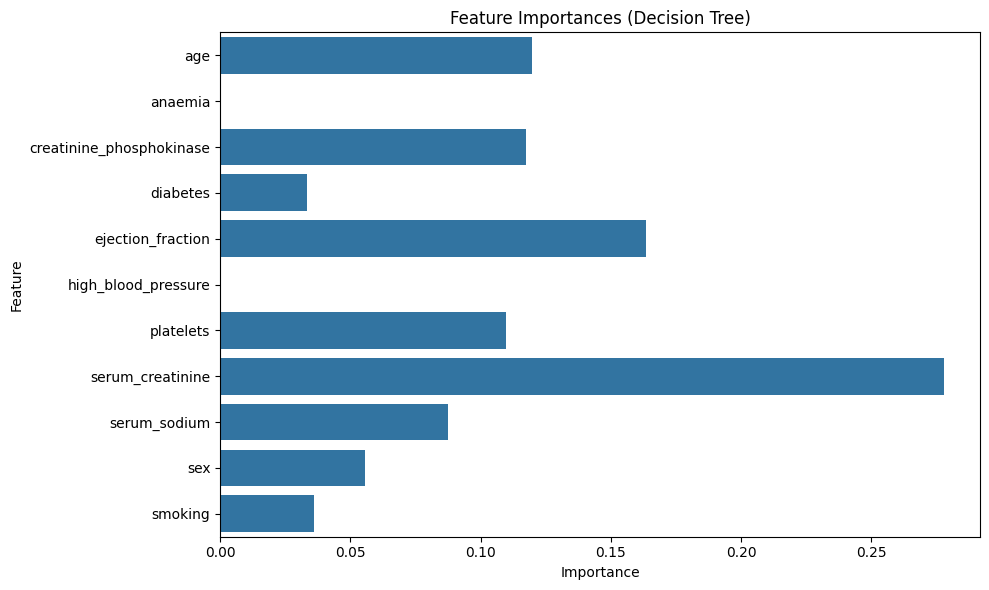

/tmp/ipykernel_4015/1736368339.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Death Event')


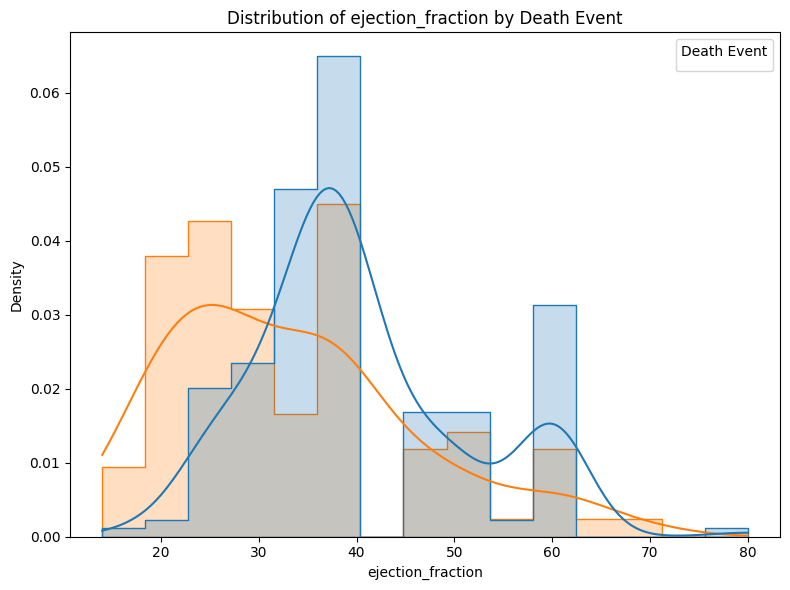

/tmp/ipykernel_4015/1736368339.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Death Event')


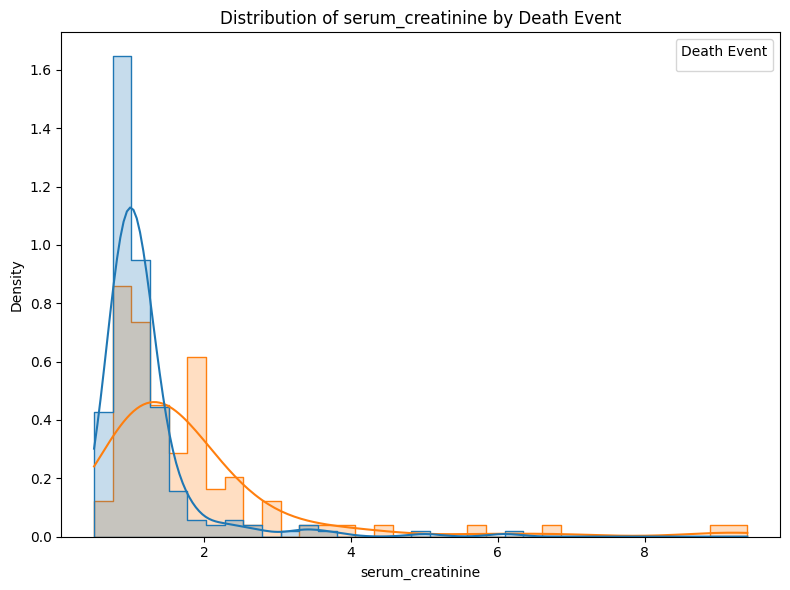

/tmp/ipykernel_4015/1736368339.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Death Event')


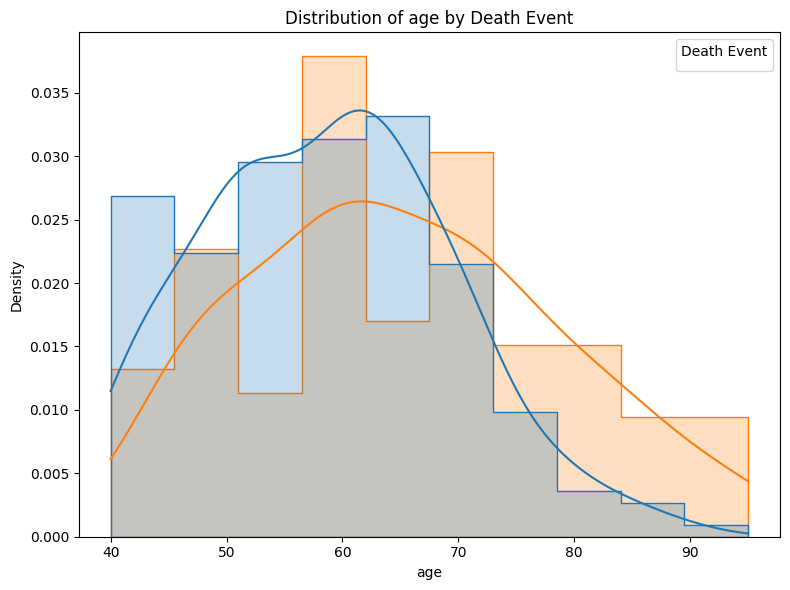

Confusion Matrix:
[[35  6]
 [11  8]]


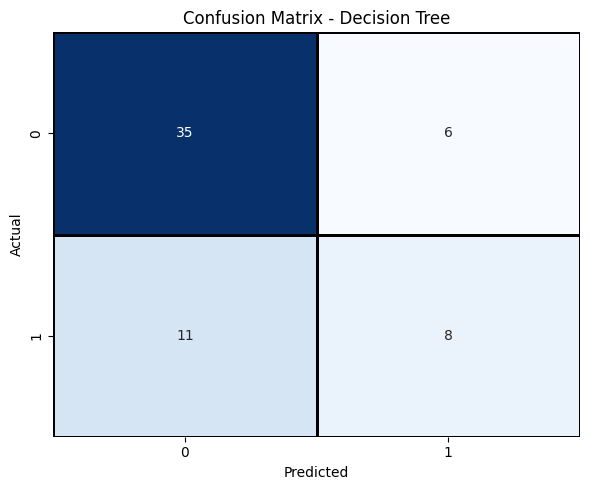

              Model  Accuracy  Precision    Recall  F1-score
0  Dummy Classifier  0.683333   0.000000  0.000000  0.000000
1     Decision Tree  0.716667   0.571429  0.421053  0.484848


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

# Concatenate X features with y target
dataset = pd.concat([X, y], axis=1)

# Drop 'time' column 
df = dataset.drop(columns=['time'])  

# Initial inspection, look for missing values
print(df.info())
print(df.describe())

# Death event distribution
target_distr = df['death_event'].value_counts()
print("Death Event Distribution:\n", target_distr)

# Model training
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Split dataset
X = df.drop(columns=['death_event'])
y = df['death_event']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred))

# Dummy Classifier
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Dummy Classifier Report:\n", classification_report(y_test, y_pred_dummy))

# Features that will be focus of report
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

important_features = df[['ejection_fraction', 'serum_creatinine', 'age']] 

# EDA figures
# Important feature distributions by death event
for column in important_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, hue='death_event', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {column} by Death Event')
    plt.legend(title='Death Event')
    plt.tight_layout()
    plt.show()

#Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect metrics for Dummy Classifier
dummy_metrics = {
    "Model": "Dummy Classifier",
    "Accuracy": accuracy_score(y_test, y_pred_dummy),
    "Precision": precision_score(y_test, y_pred_dummy, zero_division=0),
    "Recall": recall_score(y_test, y_pred_dummy, zero_division=0),
    "F1-score": f1_score(y_test, y_pred_dummy, zero_division=0)
}

# Collect metrics for Decision Tree
tree_metrics = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1-score": f1_score(y_test, y_pred, zero_division=0)
}

# Build comparison DataFrame
comparison_df = pd.DataFrame([dummy_metrics, tree_metrics])
print(comparison_df)